In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')
sns.set_style('darkgrid')
import sqlite3

In [2]:
df = pd.read_csv('shark_tank_data.csv')

In [3]:
df.head()

,Season Number,Season Start,Season End,Episode Number,Pitch Number,Original Air Date,Startup Name,Industry,Business Description,Pitchers Gender,...,Guest Investment Equity,Barbara Corcoran Present,Mark Cuban Present,Lori Greiner Present,Robert Herjavec Present,Daymond John Present,Kevin O Leary Present,Kevin Harrington Present,Guest Name,Notes
0,1,09-Aug-09,05-Feb-10,1,1,09-Aug-09,AvaTheElephant,Health/Wellness,Ava The Elephant - Baby and Child Care,Female,...,NaN,1.0,0.0,0.0,1.0,1.0,1.0,1.0,NaN,NaN
1,1,09-Aug-09,05-Feb-10,1,2,09-Aug-09,Mr.Tod'sPieFactory,Food and Beverage,Mr. Tod's Pie Factory - Specialty Food,Male,...,NaN,1.0,0.0,0.0,1.0,1.0,1.0,1.0,NaN,NaN
2,1,09-Aug-09,05-Feb-10,1,3,09-Aug-09,Wispots,Business Services,Wispots - Consumer Services,Male,...,NaN,1.0,0.0,0.0,1.0,1.0,1.0,1.0,NaN,NaN
3,1,09-Aug-09,05-Feb-10,1,4,09-Aug-09,CollegeFoxesPackingBoxes,Lifestyle/Home,College Foxes Packing Boxes - Consumer Services,Male,...,NaN,1.0,0.0,0.0,1.0,1.0,1.0,1.0,NaN,NaN
4,1,09-Aug-09,05-Feb-10,1,5,09-Aug-09,IonicEar,Software/Tech,Ionic Ear - Novelties,Male,...,NaN,1.0,0.0,0.0,1.0,1.0,1.0,1.0,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Season Number                       1038 non-null   int64  
 1   Season Start                        1038 non-null   object 
 2   Season End                          1031 non-null   object 
 3   Episode Number                      1038 non-null   int64  
 4   Pitch Number                        1038 non-null   int64  
 5   Original Air Date                   630 non-null    object 
 6   Startup Name                        1038 non-null   object 
 7   Industry                            1038 non-null   object 
 8   Business Description                1038 non-null   object 
 9   Pitchers Gender                     1033 non-null   object 
 10  Pitchers City                       498 non-null    object 
 11  Pitchers State                      739 non

In [5]:
df.isna().sum()

Season Number                            0
Season Start                             0
Season End                               7
Episode Number                           0
Pitch Number                             0
Original Air Date                      408
Startup Name                             0
Industry                                 0
Business Description                     0
Pitchers Gender                          5
Pitchers City                          540
Pitchers State                         299
Pitchers Average Age                   992
Entrepreneur Names                     557
Company Website                        570
Multiple Entrepreneurs                 487
US Viewership                          416
Original Ask Amount                      0
Original Offered Equity                  0
Valuation Requested                      0
Got Deal                                 0
Total Deal Amount                      436
Total Deal Equity                      436
Deal Valuat

In [6]:
df[df['Guest Name'].notna()]

,Season Number,Season Start,Season End,Episode Number,Pitch Number,Original Air Date,Startup Name,Industry,Business Description,Pitchers Gender,...,Guest Investment Equity,Barbara Corcoran Present,Mark Cuban Present,Lori Greiner Present,Robert Herjavec Present,Daymond John Present,Kevin O Leary Present,Kevin Harrington Present,Guest Name,Notes
10,1,09-Aug-09,05-Feb-10,3,11,23-Aug-09,TurboBaster,Food and Beverage,TurboBaster - Kitchen Tools,Female,...,100.00,1.0,0.0,0.0,1.0,1.0,1.0,1.0,Kevin Harrington,2% royalty
26,1,09-Aug-09,05-Feb-10,6,27,13-Sep-09,ElementBars,Fitness/Sports/Outdoors,Element Bars - Specialty Food,Male,...,30.00,1.0,0.0,0.0,1.0,1.0,1.0,1.0,Kevin Harrington,"license bars, entrepreneur gets 4% of sales fo..."
55,1,09-Aug-09,05-Feb-10,13,56,29-Jan-10,Caffeindicator,Food and Beverage,Caffeindicator - Novelties,Male,...,50.00,1.0,0.0,0.0,1.0,1.0,1.0,1.0,Kevin Harrington,NaN
76,2,20-Mar-11,13-May-11,4,77,08-Apr-11,BroccoliWad,Food and Beverage,Broccoli Wad - Novelties,Male,...,NaN,1.0,0.0,0.0,1.0,1.0,1.0,0.0,Jeff Foxworthy,NaN
77,2,20-Mar-11,13-May-11,4,78,08-Apr-11,HillbillyBrand,Fashion/Beauty,Hillbilly Brand - Men and Women's Apparel,Male,...,NaN,1.0,0.0,0.0,1.0,1.0,1.0,0.0,Jeff Foxworthy,7% royalty
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,13,08-Oct-21,20-May-22,1,1012,08-Oct-21,KinApparel,Fashion/Beauty,Satin Lined Hoodies Hats,Female,...,15.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Emma Grede,NaN
1015,13,08-Oct-21,20-May-22,2,1016,NaN,Songlorious,Lifestyle/Home,Personalized songs for any occasion,Mixed Team,...,10.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Peter Jones,NaN
1019,13,08-Oct-21,20-May-22,3,1020,NaN,Sparketh,Children/Education,Online art education for kids and teens,NaN,...,10.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Daniel Lubetzky,NaN
1025,13,08-Oct-21,20-May-22,4,1026,NaN,SoaPen,Lifestyle/Home,Soap pen,Female,...,10.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nirav Tolia,NaN


In [7]:
print(df[df['Original Air Date'].isna()]['Season Number'].value_counts())

8     84
9     84
11    80
10    68
7     60
12    16
13    16
Name: Season Number, dtype: int64


In [8]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')
for shark in ['corcoran_','cuban_','greiner_','herjavec_','john_','o_leary_']:
    df.columns = df.columns.str.replace(shark, '')
df.columns = df.columns.str.replace('harrington','h')
df.head()

,season_number,season_start,season_end,episode_number,pitch_number,original_air_date,startup_name,industry,business_description,pitchers_gender,...,guest_investment_equity,barbara_present,mark_present,lori_present,robert_present,daymond_present,kevin_present,kevin_h_present,guest_name,notes
0,1,09-Aug-09,05-Feb-10,1,1,09-Aug-09,AvaTheElephant,Health/Wellness,Ava The Elephant - Baby and Child Care,Female,...,NaN,1.0,0.0,0.0,1.0,1.0,1.0,1.0,NaN,NaN
1,1,09-Aug-09,05-Feb-10,1,2,09-Aug-09,Mr.Tod'sPieFactory,Food and Beverage,Mr. Tod's Pie Factory - Specialty Food,Male,...,NaN,1.0,0.0,0.0,1.0,1.0,1.0,1.0,NaN,NaN
2,1,09-Aug-09,05-Feb-10,1,3,09-Aug-09,Wispots,Business Services,Wispots - Consumer Services,Male,...,NaN,1.0,0.0,0.0,1.0,1.0,1.0,1.0,NaN,NaN
3,1,09-Aug-09,05-Feb-10,1,4,09-Aug-09,CollegeFoxesPackingBoxes,Lifestyle/Home,College Foxes Packing Boxes - Consumer Services,Male,...,NaN,1.0,0.0,0.0,1.0,1.0,1.0,1.0,NaN,NaN
4,1,09-Aug-09,05-Feb-10,1,5,09-Aug-09,IonicEar,Software/Tech,Ionic Ear - Novelties,Male,...,NaN,1.0,0.0,0.0,1.0,1.0,1.0,1.0,NaN,NaN


In [9]:
df[df.guest_investment_equity>0].guest_name.value_counts()

Chris Sacca          7
Rohan Oza            6
Alex Rodriguez       5
Kevin Harrington     4
Sara Blakely         4
Matt Higgins         3
Charles Barkley      3
Richard Branson      3
Jamie Siminoff       2
Nirav Tolia          2
Ashton Kutcher       2
Bethenny Frankel     2
Nick Woodman         2
Daniel Lubetzky      2
Troy Carter          2
Alli Webb            2
Daniel Lubetzsky     1
Emma Grede           1
Blake Mycoskie       1
Jeff Foxworthy       1
Peter Jones          1
Steve Tisch          1
John Paul DeJoria    1
Kendra Scott         1
Name: guest_name, dtype: int64

In [10]:
connection = sqlite3.connect('shark_tank_db')
cursor = connection.cursor()

In [11]:
df.to_sql('data', connection, if_exists='replace')

In [12]:
cursor.execute('SELECT distinct(guest_name) from data')
cursor.fetchall()

[(None,),
 ('Kevin Harrington',),
 ('Jeff Foxworthy',),
 ('John Paul DeJoria',),
 ('Steve Tisch',),
 ('Nick Woodman',),
 ('Ashton Kutcher',),
 ('Troy Carter',),
 ('Chris Sacca',),
 ('Richard Branson',),
 ('Rohan Oza',),
 ('Alex Rodriguez',),
 ('Sara Blakely',),
 ('Bethenny Frankel',),
 ('Jamie Siminoff',),
 ('Matt Higgins',),
 ('Charles Barkley',),
 ('Alli Webb',),
 ('Blake Mycoskie',),
 ('Kendra Scott',),
 ('Daniel Lubetzsky',),
 ('Daniel Lubetzky',),
 ('Emma Grede',),
 ('Peter Jones',),
 ('Nirav Tolia',)]

In [13]:
df.isna().sum()

season_number                     0
season_start                      0
season_end                        7
episode_number                    0
pitch_number                      0
original_air_date               408
startup_name                      0
industry                          0
business_description              0
pitchers_gender                   5
pitchers_city                   540
pitchers_state                  299
pitchers_average_age            992
entrepreneur_names              557
company_website                 570
multiple_entrepreneurs          487
us_viewership                   416
original_ask_amount               0
original_offered_equity           0
valuation_requested               0
got_deal                          0
total_deal_amount               436
total_deal_equity               436
deal_valuation                  436
number_of_sharks_in_deal        436
investment_amount_per_shark     436
equity_per_shark                436
royalty_deal                

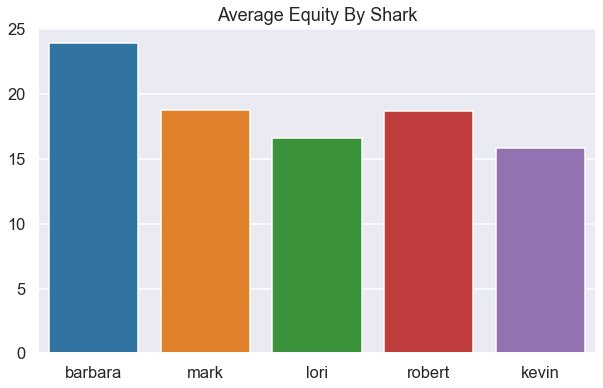

In [14]:
sharks = ['barbara', 'mark', 'lori', 'robert', 'kevin']
means = []
for shark in sharks:
    means.append(df['{}_investment_equity'.format(shark)].mean())
fig = plt.figure(figsize=(10,6))
sns.barplot(x=sharks, y=means)
plt.title('Average Equity By Shark')
plt.show()

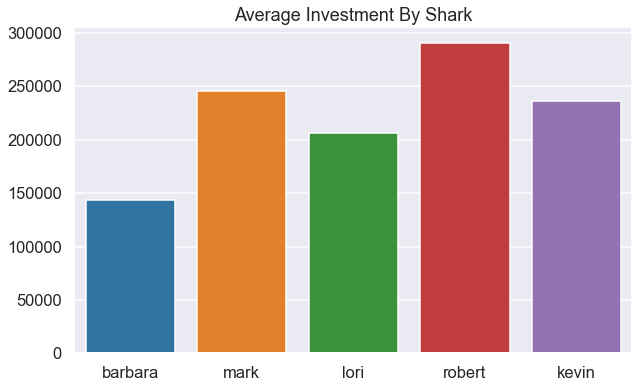

In [15]:
sharks = ['barbara', 'mark', 'lori', 'robert', 'kevin']
means = []
for shark in sharks:
    means.append(df['{}_investment_amount'.format(shark)].mean())
fig = plt.figure(figsize=(10,6))
sns.barplot(x=sharks, y=means)
plt.title('Average Investment By Shark')
plt.show()

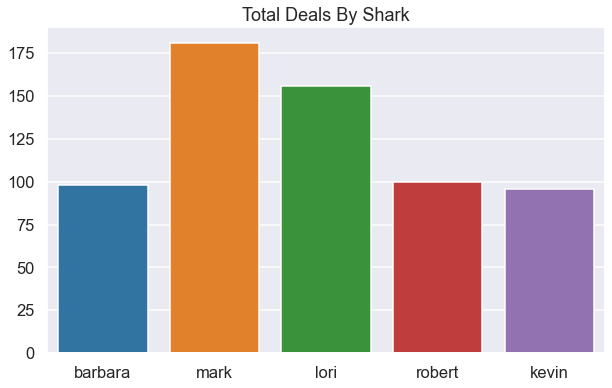

In [16]:
sharks = ['barbara', 'mark', 'lori', 'robert', 'kevin']
counts = []
for shark in sharks:
    counts.append(df['{}_investment_amount'.format(shark)].count())
fig = plt.figure(figsize=(10,6))
sns.barplot(x=sharks, y=counts)
plt.title('Total Deals By Shark')
plt.show()

In [22]:
df.original_air_date = pd.to_datetime(df.original_air_date)

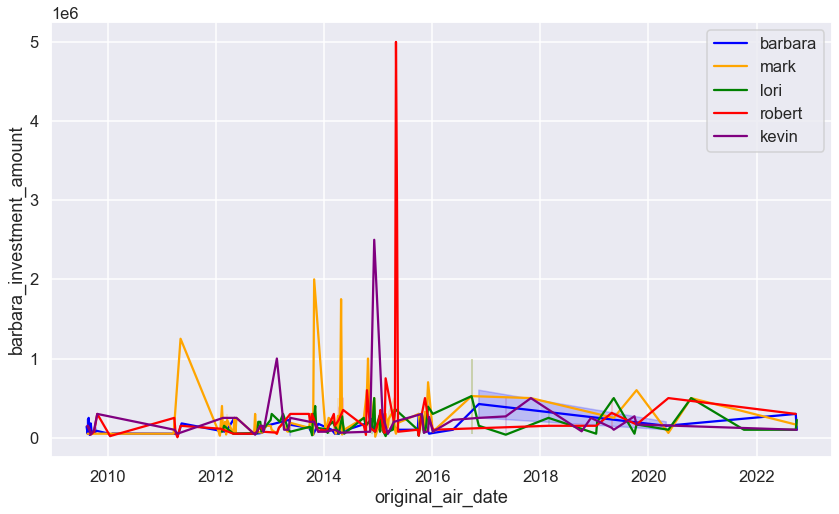

In [32]:
colors = ['blue','orange','green','red','purple']
fig = plt.figure(figsize=(14,8))
for i,shark in enumerate(sharks):
    shark_df = df[df['{}_investment_equity'.format(shark)] > 0]
    y = shark_df['{}_investment_amount'.format(shark)]
    x = shark_df.original_air_date
    sns.lineplot(x=x, y=y, color=colors[i], label=shark)
plt.legend()
plt.show()